In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import plotly.express as px
import functions

Load data 

In [159]:
df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/combined_clean_data.csv', index_col=0)
df.columns
df

,id,price_x,grade_x,date_x,yr_built_x,yr_renovated_x,floors_1.5,floors_2.0,floors_2.5,floors_3.0,...,view_y,waterfront,zipcode,lat,long,cat_waterfront,cat_view,cat_condition,cat_grade,cat_zipcode
0,7129300520,221900.0,4,2014-10-13,1955,NaN,0,0,0,0,...,NONE,NaN,98178,47.5112,-122.257,NaN,NONE,Average,7 Average,98178
1,6414100192,538000.0,4,2014-12-09,1951,1991.0,0,1,0,0,...,NONE,NO,98125,47.7210,-122.319,NO,NONE,Average,7 Average,98125
2,5631500400,180000.0,3,2015-02-25,1933,NaN,0,0,0,0,...,NONE,NO,98028,47.7379,-122.233,NO,NONE,Average,6 Low Average,98028
3,2487200875,604000.0,4,2014-12-09,1965,NaN,0,0,0,0,...,NONE,NO,98136,47.5208,-122.393,NO,NONE,Very Good,7 Average,98136
4,1954400510,510000.0,5,2015-02-18,1987,NaN,0,0,0,0,...,NONE,NO,98074,47.6168,-122.045,NO,NONE,Average,8 Good,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,263000018,360000.0,5,2014-05-21,2009,NaN,0,0,0,1,...,NONE,NO,98103,47.6993,-122.346,NO,NONE,Average,8 Good,98103
18179,6600060120,400000.0,5,2015-02-23,2014,NaN,0,1,0,0,...,NONE,NO,98146,47.5107,-122.362,NO,NONE,Average,8 Good,98146
18180,1523300141,402101.0,4,2014-06-23,2009,NaN,0,1,0,0,...,NONE,NO,98144,47.5944,-122.299,NO,NONE,Average,7 Average,98144
18181,291310100,400000.0,5,2015-01-16,2004,NaN,0,1,0,0,...,NONE,NaN,98027,47.5345,-122.069,NaN,NONE,Average,8 Good,98027


In [160]:
df_matrix = df.corr()
df_matrix['zipcode']

id               -0.008561
price_x           0.009041
grade_x          -0.199333
yr_built_x       -0.338053
yr_renovated_x   -0.050559
floors_1.5        0.132473
floors_2.0       -0.196119
floors_2.5        0.003166
floors_3.0        0.103084
floors_3.5        0.008872
renovated         0.052314
price_y           0.009041
sqft_living      -0.220305
sqft_lot         -0.128819
bedrooms         -0.150346
bathrooms        -0.226022
price             0.007768
yr_renovated_y   -0.050559
yr_built_y       -0.338053
condition        -0.031479
grade_y          -0.199333
zipcode           1.000000
lat               0.303229
long             -0.548331
cat_zipcode       1.000000
Name: zipcode, dtype: float64

In [161]:
fig = px.scatter_mapbox(df,
                        lat='lat',
                        lon='long',
                        color='zipcode',
                        zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

In [162]:
df.drop(columns=['date_x', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'yr_renovated_x','sqft_living', 'sqft_lot', 'bedrooms',
       'bathrooms', 'date_y', 'lat', 'long', 'cat_waterfront', 'cat_grade', 'cat_zipcode', 'grade_x', 'price_y', 'price_x', 'cat_view', 'cat_condition', 'grade_y', 'id', 'yr_built_y'],inplace=True)
df.head()

,yr_built_x,renovated,view_x,price,yr_renovated_y,condition,view_y,waterfront,zipcode
0,1955,0,NONE,221900.0,NaN,3,NONE,NaN,98178
1,1951,1,NONE,538000.0,1991.0,3,NONE,NO,98125
2,1933,0,NONE,180000.0,NaN,3,NONE,NO,98028
3,1965,0,NONE,604000.0,NaN,5,NONE,NO,98136
4,1987,0,NONE,510000.0,NaN,3,NONE,NO,98074


In [163]:
df.describe()

,yr_built_x,renovated,price,yr_renovated_y,condition,zipcode
count,18183.000000,18183.000000,18183.000000,452.000000,18183.000000,18183.000000
mean,1969.713414,0.024858,405356.432382,1992.283186,3.390915,98080.111808
std,28.427908,0.155698,141548.481047,17.274088,0.645137,54.042179
min,1900.000000,0.000000,78000.000000,1934.000000,1.000000,98001.000000
25%,1951.000000,0.000000,292000.000000,1983.000000,3.000000,98033.000000
50%,1970.000000,0.000000,395000.000000,1994.000000,3.000000,98065.000000
75%,1993.000000,0.000000,515000.000000,2006.000000,4.000000,98119.000000
max,2015.000000,1.000000,700180.000000,2015.000000,5.000000,98199.000000


In [164]:
df.columns

Index(['yr_built_x', 'renovated', 'view_x', 'price', 'yr_renovated_y',
       'condition', 'view_y', 'waterfront', 'zipcode'],
      dtype='object')

In [165]:

df_matrix = df.corr()
df_matrix['zipcode']

yr_built_x       -0.338053
renovated         0.052314
price             0.007768
yr_renovated_y   -0.050559
condition        -0.031479
zipcode           1.000000
Name: zipcode, dtype: float64

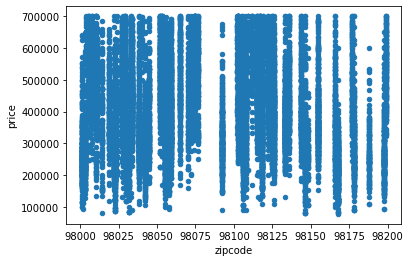

In [167]:
df.plot(kind='scatter', x='zipcode', y='price');


In [166]:
X = df.drop(columns=['price'])
y = df['price']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

model = sm.OLS(y_train, sm.add_constant(X_train['zipcode'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.620
Date:                Thu, 07 Oct 2021   Prob (F-statistic):              0.203
Time:                        02:07:42   Log-Likelihood:            -1.6176e+05
No. Observations:               12182   AIC:                         3.235e+05
Df Residuals:                   12180   BIC:                         3.235e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.553e+06   2.32e+06     -1.099      0.272   -7.11e+06       2e+06
zipcode       30.1572     23.690      1.273      0.203     -16.280      76.594
==============================================================================
Omnibus:                     1306.818   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.300
Skew:                           0.206   Prob(JB):                     2.46e-96
Kurtosis:                       2.164   Cond. No.                     1.78e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""